In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill - Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill - Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Output')
cur_date = "040222"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
var_imp_inflamm = data.frame(read_excel("040222_noise_Significant_predictors_inflamm.xlsx"))
var_imp_lung = data.frame(read_excel("040222_noise_Significant_predictors_lung.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
head(var_imp_inflamm)
head(var_imp_lung)

,Predictor,MeanDecreaseGini
,<chr>,<dbl>
1,noise1,0.8557126
2,IL16,0.3488399
3,Eotaxin,0.3291924
4,MPO,0.3249210
5,IP10,0.3143937
6,bEP_Chol,0.2758986


,Predictor,MeanDecreaseGini
,<chr>,<dbl>
1,Chol,0.7164556
2,IL15,0.3441894
3,25OH_VitD,0.3271854
4,MPO,0.3050660
5,dHLan,0.3026085
6,bEP_Chol,0.2981946


In [4]:
#creating a col that specifies which the response variable before creating 1 df
var_imp_inflamm$Response = "Inflammatory"
var_imp_lung$Response = "Lung"

var_imp_df = full_join(var_imp_inflamm, var_imp_lung)

head(var_imp_df)

Joining, by = c("Predictor", "MeanDecreaseGini", "Response")


,Predictor,MeanDecreaseGini,Response
,<chr>,<dbl>,<chr>
1,noise1,0.8557126,Inflammatory
2,IL16,0.3488399,Inflammatory
3,Eotaxin,0.3291924,Inflammatory
4,MPO,0.3249210,Inflammatory
5,IP10,0.3143937,Inflammatory
6,bEP_Chol,0.2758986,Inflammatory


In [17]:
var_imp_df %>% 
             filter(MeanDecreaseGini > 0.15, grepl("noise", Predictor))

Predictor,MeanDecreaseGini,Response
<chr>,<dbl>,<chr>
noise1,0.8557126,Inflammatory
noise2,0.1873616,Lung


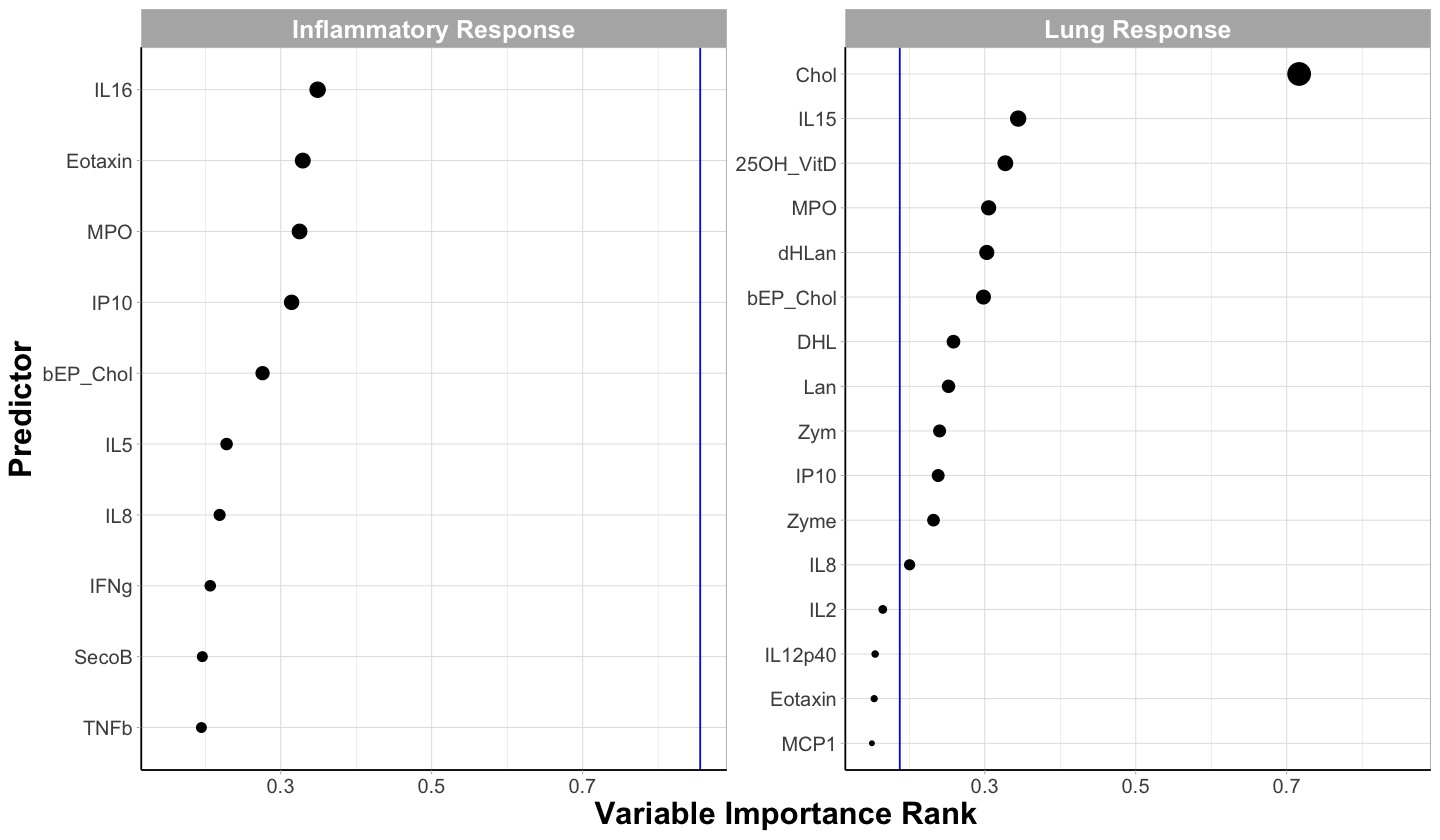

In [33]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
new_facet_labels = c("Inflammatory Response", "Lung Response")
names(new_facet_labels) = c("Inflammatory", "Lung")

#only plotting features w/ a mean decrease gini > 0.2
ggplot() + 
  geom_point(data = var_imp_df %>% 
             filter(MeanDecreaseGini > 0.15, !grepl("noise", Predictor)), 
             aes(x = MeanDecreaseGini, y = reorder_within(Predictor, MeanDecreaseGini, Response), 
                 size = MeanDecreaseGini)) + 
  geom_vline(data = var_imp_df %>% 
             filter(MeanDecreaseGini > 0.15, grepl("noise", Predictor)),
                    aes(xintercept = MeanDecreaseGini), color = "blue") +

  facet_wrap(~Response, scales = 'free_y', labeller = labeller(Response = new_facet_labels)) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor', color = "Above \nNoise?") + #changing axis labels 
  
  #this removes response variable from y axes
  scale_y_reordered() +
  #removing size legend
  guides(size = "none")